In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def custom_date_parser(date_string):
    return pd.to_datetime(date_string, format='%Y%m%d')



In [3]:
data = pd.read_excel(r"C:\Users\yasar\Downloads\dataset CP.xlsx", parse_dates=['date'], date_parser=custom_date_parser)


In [4]:
data.head

<bound method NDFrame.head of           date   side  performance      dt
0   2023-02-09   left        False   736.2
1   2023-02-09   left        False   254.8
2   2023-02-09   left        False   371.6
3   2023-02-09   left        False   534.0
4   2023-02-09   left        False   454.2
..         ...    ...          ...     ...
628 2023-03-02   left        False   627.6
629 2023-03-02  right         True    69.4
630 2023-03-02   left         True  8493.2
631 2023-03-02  right         True    13.2
632 2023-03-02   left         True  4712.8

[633 rows x 4 columns]>

In [5]:
data.shape

(633, 4)

In [6]:
data.isnull().sum()

date           0
side           0
performance    0
dt             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         633 non-null    datetime64[ns]
 1   side         633 non-null    object        
 2   performance  633 non-null    bool          
 3   dt           633 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 15.6+ KB


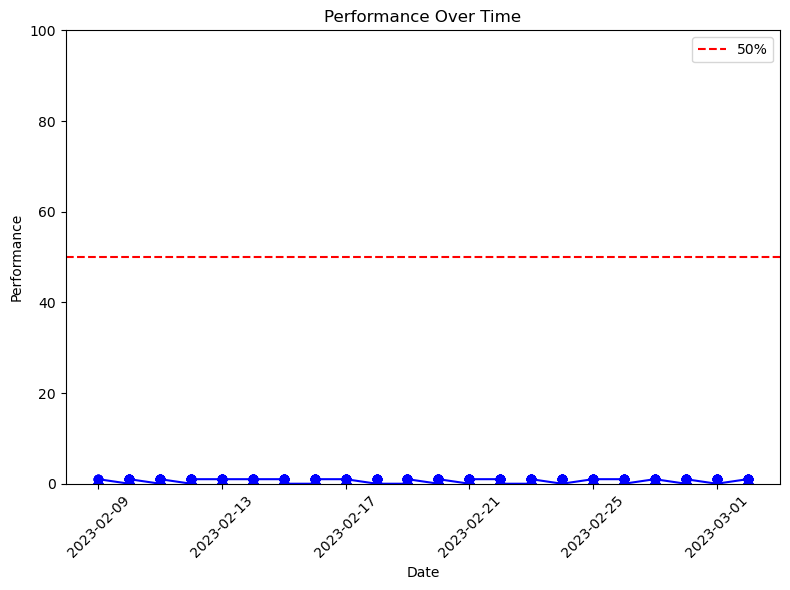

In [8]:
# Plot 1: Performance Over Time
plt.figure(figsize=(8, 6))
plt.plot(data['date'], data['performance'], marker='o', linestyle='-', color='blue')
plt.axhline(y=50, color='red', linestyle='--', label='50%')
plt.ylim(0, 100)
plt.xlabel('Date')
plt.ylabel('Performance')
plt.title('Performance Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot1.png')
plt.show()


All the points in the graph are at 0, it indicates that the performance is consistently at the lowest level throughout the observed time period. This suggests that there is no measurable performance or that the performance metric being used is consistently zero.

The graph shows a flat line at y = 0, indicating no variation or improvement in performance over time. 

The horizontal red dashed line at y = 50% would not be relevant in this scenario since all the points are at 0%.

The system or process being measured has no performance or has completely failed to achieve any positive performance throughout the observed time period.

The graph suggests a clear trend of low or zero performance over time.

It implies the need for investigation, troubleshooting, or problems like malfunctioning equipment, operational inefficiencies, or other underlying factors impacting performance negatively.

The graph serves as a visual representation of the consistent lack of performance, emphasizing the need for improvement measures to enhance the system's functionality and achieve desired performance levels.

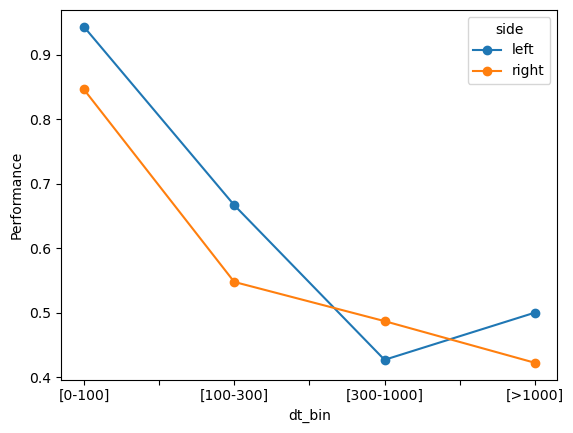

In [9]:
# Set up the figure and axes for the second plot
fig, ax2 = plt.subplots()
ax2.set_xlabel('dt')
ax2.set_ylabel('Performance')

# Bin dt values
bins = [0, 100, 300, 1000, float('inf')]
labels = ['[0-100]', '[100-300]', '[300-1000]', '[>1000]']
data['dt_bin'] = pd.cut(data['dt'], bins=bins, labels=labels)

# Pivot the data and plot performance dependence on dt
data_pivot = data.pivot_table(index='dt_bin', columns='side', values='performance', aggfunc='mean')
data_pivot.plot(ax=ax2, marker='o')

# Show the plots
plt.show()


The second plot shows the performance dependence on the duration (dt) categorized into different bins. The x-axis represents the duration bins, while the y-axis represents the performance level.
From the plot, we can observe the following trends and differences:

Overall Trend: Both the left and right sides exhibit a decreasing trend as the duration increases. This suggests that performance tends to decline with longer durations.

Left Side: The performance of the left side shows a significant increase in the [>1000] duration range. This indicates that for very long durations, the left side performs relatively better compared to other duration ranges.

Right Side: The performance of the right side decreases as the duration increases. However, it is consistently higher than the left side in the [300-1000] duration range. This implies that for moderate durations, the right side outperforms the left side.

Performance Disparity: There is a noticeable performance difference between the left and right sides. The left side generally exhibits lower performance across all duration ranges, except for the [>1000] range where it surpasses the right side.

Overall, the plot suggests that the duration has an impact on performance, with longer durations generally leading to decreased performance. Additionally, there seems to be a performance advantage for the left side in very long durations, while the right side performs better than the left side in moderate durations. These trends and differences can provide valuable insights for analyzing and understanding the performance dynamics of the left and right sides.